In [1]:
# system libraries
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# processing and visualisation libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# data cleaning functions
from data_processing import load_and_clean_survey_data

df = load_and_clean_survey_data('../data/raw/GiG2025_clean.csv')

In [2]:
df.head()

,first_name,last_name,email_id,academic_position,faculty,department,discipline,health_research_keywords,research_methods,research_methods_other,...,health_third_mission,participate_in_kinderuni,participate_in_lndf,outreach_other,collab_fac1,collab_fac2,collab_uni1,collab_uni2,collab_uni3,collab_uni4
0,Giorgia,Silani,giorgia.silani@univie.ac.at,Associate Professor/Ao. Professor,Faculty of Psychology,Department of Clinical and Health Psychology,social neuroscience,"[mental health literacy, emotions, empathy, ne...",mainly quantitative,-99,...,-99,"Yes, please contact me about it","Yes, please contact me about it",-99,Faculty of Computer science,Centre for Sport Science and University Sports,Graz Medical University,University of Salzburg,None,None
1,Laura,König,laura.koenig@univie.ac.at,Full Professor,Faculty of Psychology,Department of Clinical and Health Psychology,Health psychology,"[health promotion, diet, physical activity, se...",mainly quantitative,-99,...,"lay audiences/ general public, e.g. via podcas...",No,"Yes, please contact me about it",-99,Faculty of Social sciences,None,Vienna Medical University,University of Music and Performing Arts in Vienna,None,None
2,Julia,Holzer,julia.holzer@univie.ac.at,Scientific Staff,Faculty of Psychology,Department of Developmental and Educational Ps...,Psychology,"[well-being, motivation, basic psychological n...",both quantitative and qualitative,-99,...,I regularly give talks and workshops for vario...,"Yes, please contact me about it","Yes, please contact me about it",-99,Faculty of Life sciences,None,None,None,None,None
3,Martina,Zemp,martina.zemp@univie.ac.at,Full Professor,Faculty of Psychology,Department of Clinical and Health Psychology,Clinical Child and Adolescent Psychology,"[children, adolescents, families, couples, rel...",mainly quantitative,-99,...,-99,No,No,-99,Centre for Teacher Education,None,Vienna Medical University,None,None,None
4,Valeria,Bordone,valeria.bordone@univie.ac.at,Associate Professor/Ao. Professor,Faculty of Social sciences,Department of Sociology,Sociology,"[Cognition, wellbeing, intergenerational relat...",mainly quantitative,-99,...,-99,"Yes, please contact me about it",No,-99,None,None,None,None,None,None


In [3]:
# Combine all the columns into a single series
all_faculty = pd.concat([df['faculty'], df['collab_fac1'], df['collab_fac2']])

# Get unique items and sort them alphabetically
unique_faculty_sorted = sorted(all_faculty.dropna().unique())

unique_faculty_sorted

['Centre for Microbiology and Environmental Systems Science',
 'Centre for Molecular Biology',
 'Centre for Sport Science and University Sports',
 'Centre for Teacher Education',
 'Faculty of Catholic Theology',
 'Faculty of Chemistry',
 'Faculty of Computer science',
 'Faculty of Law',
 'Faculty of Life sciences',
 'Faculty of Philological and Cultural Studies',
 'Faculty of Protestant Theology',
 'Faculty of Psychology',
 'Faculty of Social sciences']

In [4]:
# Combine all the columns into a single series
all_uni = pd.concat([df['collab_uni1'], df['collab_uni1'], df['collab_uni2'], df['collab_uni3'], df['collab_uni4']])

# Get unique items and sort them alphabetically
unique_uni_sorted = sorted(all_uni.dropna().unique())

unique_uni_sorted

['Austrian Academy of Science',
 'Graz Medical University',
 'IIASA',
 'Karl Landsteiner Privatuniversität',
 'MCI Innsbruck',
 'MCI Salzburg',
 'Other, not listed, organizations',
 'TU Wien',
 'UMIT Tirol',
 'University Mozarteum Salzburg',
 'University of Applied Sciences St. Pölten, Institute of Health Sciences',
 'University of Applied Sciences Vienna & multiple social organizations',
 'University of Graz',
 'University of Innsbruck',
 'University of Linz',
 'University of Music and Performing Arts in Vienna',
 'University of Natural Resources and Applied Life Sciences Vienna',
 'University of Salzburg',
 'University of Veterinary Medicine Vienna',
 'Vienna Medical University',
 'Vienna University of Economics and Business Administration',
 'ÖAW, IIASA']

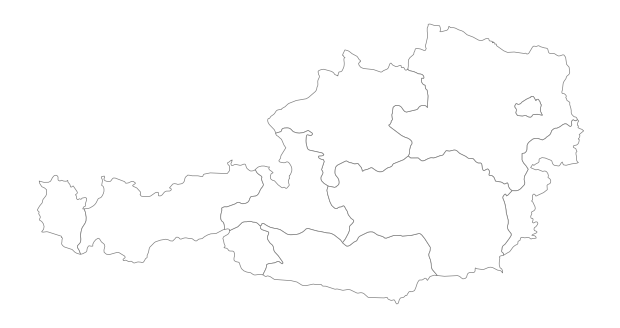

In [5]:
gdf = gpd.read_file(r'../data/raw/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp')

# Filter for Austria (ISO country code: "AT")
austria_gdf = gdf[gdf["iso_a2"] == "AT"]

fig, ax = plt.subplots(figsize=(8,4))
austria_gdf.plot(linewidth=0.5, edgecolor='grey', legend=False, color='white', ax=ax)

ax.set_axis_off()

plt.show()

In [6]:
austria_gdf.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
377,Admin-1 states provinces,6,AUT-2330,2330,AT-3,None,AT,1,Niederösterreich,Lower Austria|Baixa-Áustria|Baja Austria|Niede...,...,None,None,None,None,None,None,None,None,None,"POLYGON ((15.00397 49.00977, 15.05958 48.99722..."
379,Admin-1 states provinces,6,AUT-2326,2326,AT-4,None,AT,1,Oberösterreich,Upper Austria|Alta-Áustria|Alta Austria|Österr...,...,None,None,None,None,None,None,None,None,None,"POLYGON ((14.67562 48.57624, 14.69114 48.58653..."
385,Admin-1 states provinces,6,AUT-2322,2322,AT-1,None,AT,1,Burgenland,Burgenlândia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((17.14834 48.00544, 17.0856 47.97015,..."
397,Admin-1 states provinces,6,AUT-2320,2320,AT-8,None,AT,1,Vorarlberg,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((9.86057 47.0016, 9.85633 47.00408, 9..."
398,Admin-1 states provinces,6,AUT-2329,2329,AT-7,None,AT,1,Tirol,Tyrol,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((10.13197 46.84657, 10.12519 46..."


In [7]:
austria_states = austria_gdf['name'].tolist()
austria_states

['Niederösterreich',
 'Oberösterreich',
 'Burgenland',
 'Vorarlberg',
 'Tirol',
 'Salzburg',
 'Kärnten',
 'Steiermark',
 'Wien']

In [8]:
# Assuming we have a predefined mapping of universities to states
uni_to_state_mapping = {
    'Austrian Academy of Science': 'Wien',
    'Graz Medical University': 'Steiermark',
    'IIASA': 'Niederösterreich',
    'Karl Landsteiner Privatuniversität': 'Niederösterreich',
    'MCI Innsbruck': 'Tirol',
    'MCI Salzburg': 'Salzburg',
    'TU Wien': 'Wien',
    'UMIT Tirol': 'Tirol',
    'University Mozarteum Salzburg': 'Salzburg',
    'University of Applied Sciences St. Pölten, Institute of Health Sciences': 'Niederösterreich',
    'University of Applied Sciences Vienna & multiple social organizations': 'Wien',
    'University of Graz': 'Steiermark',
    'University of Innsbruck': 'Tirol',
    'University of Linz': 'Oberösterreich',
    'University of Music and Performing Arts in Vienna': 'Wien',
    'University of Natural Resources and Applied Life Sciences Vienna': 'Wien',
    'University of Salzburg': 'Salzburg',
    'University of Veterinary Medicine Vienna': 'Wien',
    'Vienna Medical University': 'Wien',
    'Vienna University of Economics and Business Administration': 'Wien',
    'ÖAW, IIASA': 'Niederösterreich'
}

# Map each unique university to its corresponding state
uni_state_mapping = {uni: uni_to_state_mapping.get(uni, None) for uni in unique_uni_sorted}

uni_state_mapping

{'Austrian Academy of Science': 'Wien',
 'Graz Medical University': 'Steiermark',
 'IIASA': 'Niederösterreich',
 'Karl Landsteiner Privatuniversität': 'Niederösterreich',
 'MCI Innsbruck': 'Tirol',
 'MCI Salzburg': 'Salzburg',
 'Other, not listed, organizations': None,
 'TU Wien': 'Wien',
 'UMIT Tirol': 'Tirol',
 'University Mozarteum Salzburg': 'Salzburg',
 'University of Applied Sciences St. Pölten, Institute of Health Sciences': 'Niederösterreich',
 'University of Applied Sciences Vienna & multiple social organizations': 'Wien',
 'University of Graz': 'Steiermark',
 'University of Innsbruck': 'Tirol',
 'University of Linz': 'Oberösterreich',
 'University of Music and Performing Arts in Vienna': 'Wien',
 'University of Natural Resources and Applied Life Sciences Vienna': 'Wien',
 'University of Salzburg': 'Salzburg',
 'University of Veterinary Medicine Vienna': 'Wien',
 'Vienna Medical University': 'Wien',
 'Vienna University of Economics and Business Administration': 'Wien',
 'ÖAW, 

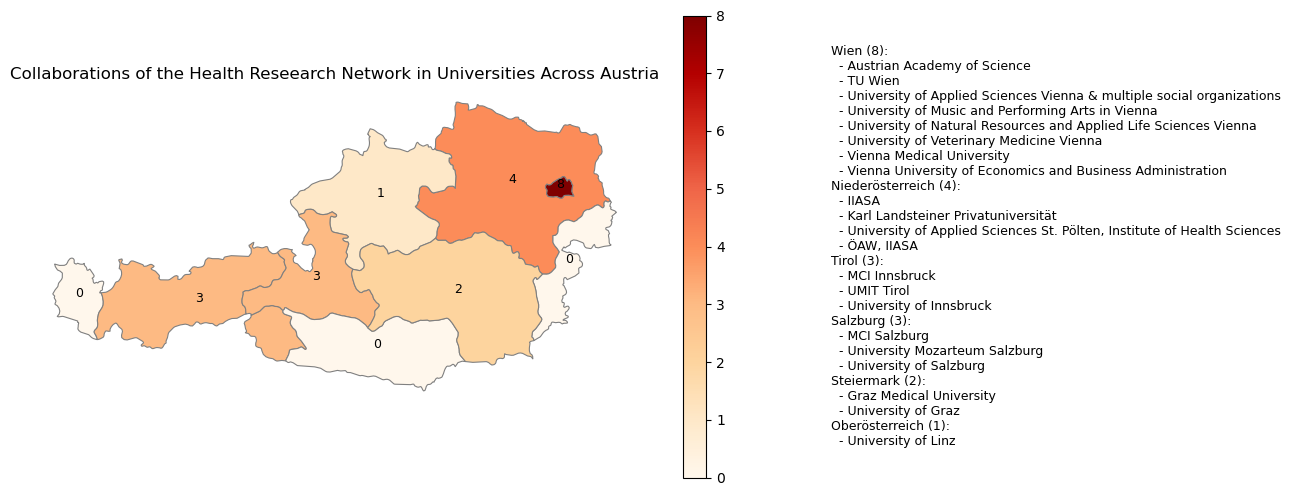

In [10]:
from collections import Counter

# Count the number of times each state appears in uni_state_mapping
state_counts = Counter(uni_state_mapping.values())

# Add the counts to the GeoDataFrame
austria_gdf.loc[:, 'count'] = austria_gdf.copy()['name'].map(state_counts).fillna(0)

# Plot the map
fig, ax = plt.subplots(figsize=(10, 6))
austria_gdf.plot(column='count', cmap='OrRd', linewidth=0.8, edgecolor='grey', legend=True, ax=ax)

# Annotate the states with their counts
for idx, row in austria_gdf.iterrows():
    plt.annotate(text=row['count'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                horizontalalignment='center', fontsize=9, color='black')
    
plt.title('Collaborations of the Health Reseearch Network in Universities Across Austria')

# Create a legend with state counts and associated universities
legend_labels = []
for state, count in state_counts.most_common():
    if state:
        universities = [uni for uni, st in uni_state_mapping.items() if st == state]
        legend_labels.append(f"{state} ({count}):")
        for uni in universities:
            legend_labels.append(f"  - {uni}")

# Add the legend to the plot
legend_text = "\n".join(legend_labels)
plt.gcf().text(1.3, 0.5, legend_text, fontsize=9, verticalalignment='center', transform=ax.transAxes)

ax.set_axis_off()
plt.show()